In [1]:
import json
import os
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
user_set = set()
with open('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/users.json', 'r') as file_open:
    loaded = json.loads(file_open.read())
    user_set.update(loaded[0].keys())

In [3]:
user_set

{'color',
 'deleted',
 'id',
 'is_admin',
 'is_app_user',
 'is_bot',
 'is_owner',
 'is_primary_owner',
 'is_restricted',
 'is_ultra_restricted',
 'name',
 'profile',
 'real_name',
 'team_id',
 'tz',
 'tz_label',
 'tz_offset',
 'updated'}

In [4]:
channels_set = set()
with open('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json', 'r') as file_open:
    loaded = json.loads(file_open.read())
    channels_set.update(loaded[0].keys())

In [5]:
channels_set

{'created',
 'creator',
 'id',
 'is_archived',
 'is_general',
 'members',
 'name',
 'pins',
 'purpose',
 'topic'}

## Memebership graph

In [6]:
# members and channels in one bag
def static_graph_builder(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        for i in loaded:
            G.add_node(i['name'], role='room')
            G.add_nodes_from(i['members'], role='users')
            for j in i['members']:
                G.add_edge(i['name'], j)
    return G

In [7]:
G = static_graph_builder('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [8]:
G.number_of_nodes()

54639

In [9]:
G.number_of_edges()

1062962

In [10]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 54639\nNumber of edges: 1062962\nAverage degree:  38.9085'

In [11]:
if nx.is_connected(G):
    print('Граф является ненаправленным и связным.')
else:
    print('Граф является ненаправленным и состоит из нескольких компонент.')

Граф является ненаправленным и состоит из нескольких компонент.


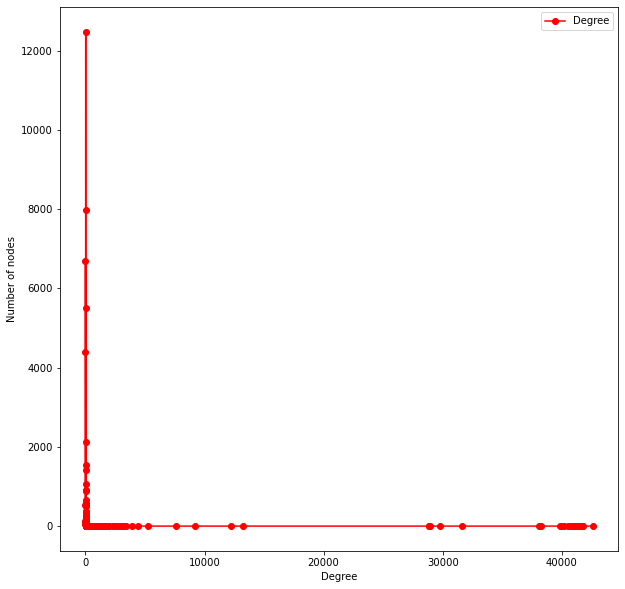

In [12]:
degree = dict(G.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 10))
plt.plot(degree_values, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

In [21]:
# user to user graph, where channels are edges
def static_graph_builder_user_to_user(path_):
    G = nx.MultiGraph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        for i in loaded:
            G.add_nodes_from(i['members'])
            for j in i['members']:
                for k in i['members']:
                    if j != k:
                        G.add_edge(j, k)
    return G

In [ ]:
G_us = static_graph_builder_user_to_user('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [ ]:
nx.info(G_us)

In [13]:
# channel to channel graph, where common users are edges
def static_graph_builder_channel_to_channel(path_):
    G = nx.MultiGraph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())        
        for i in loaded:
            G.add_node(i['name'])
            for j in loaded:
                G.add_node(j['name'])
                if i != j:
                    s = set(i['members'])
                    s.update(set(j['members']))
                    for k in s:
                        G.add_edge(i['name'], j['name'], k)
    return G

In [ ]:
G_ch = static_graph_builder_channel_to_channel('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [18]:
# channel to channel weighted graph, where common users are edges. With loops
def static_graph_weighted(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())        
        for i in loaded:
            G.add_node(i['name'])
            for j in loaded:
                G.add_node(j['name'])
                if i != j:
                    s = set(i['members'])
                    s.update(set(j['members']))
                    G.add_edge(i['name'], j['name'], weight=len(s))
    return G

In [20]:
G_w = static_graph_weighted('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [21]:
nx.info(G_w)

'Name: \nType: Graph\nNumber of nodes: 366\nNumber of edges: 66795\nAverage degree: 365.0000'

In [13]:
# weighted links between channels
from itertools import combinations

def static_graph_weighted2(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        namelist = [i['name'] for i in loaded]
        G.add_nodes_from(namelist)
        edgeslist = [items for items in combinations(namelist, r=2)]
        for j in edgeslist:
            s = set()
            for i in loaded:
                if i['name'] == j[0] or i['name'] == j[1]:
                    s.update(i['members'])            
            if s:
                G.add_edge(j[0], j[1], weight=len(s))
    return G

In [14]:
# channels by users
def channel_fullness(path_):
    chF = {}
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        chF = {i['name']: len(i['members']) for i in loaded}
    return chF

In [15]:
G_w2 = static_graph_weighted2('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [16]:
nx.info(G_w2)

'Name: \nType: Graph\nNumber of nodes: 366\nNumber of edges: 65805\nAverage degree: 359.5902'

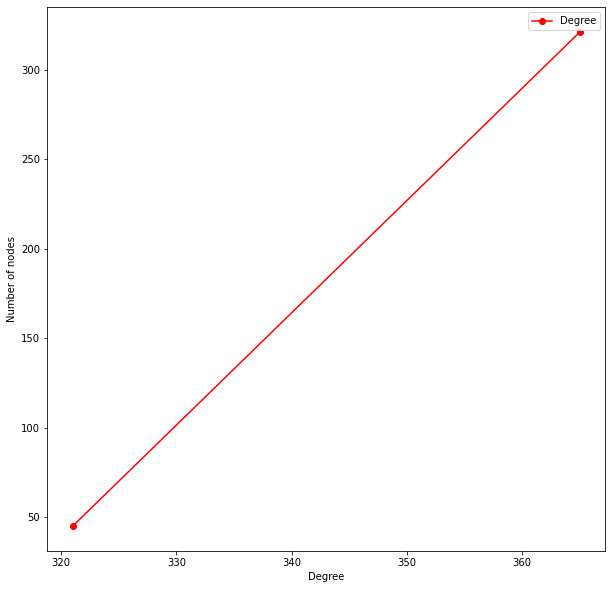

In [17]:
degree = dict(G_w2.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 10))
plt.plot(degree_values, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

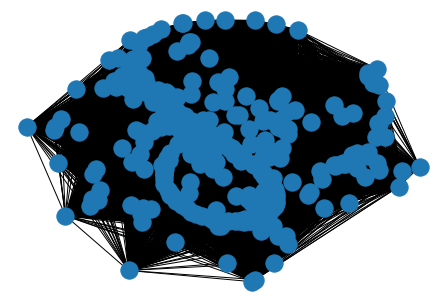

In [18]:
nx.draw(G_w2)

In [19]:
pr = nx.pagerank(G_w2)

In [20]:
pr

{'_general': 0.01916462855494472,
 '_random_talks': 0.0036510683610275507,
 'kaggle_crackers': 0.018491293955166126,
 'lang_r': 0.0173808587610939,
 '_meetings': 0.01855106768689426,
 'proj_dota2': 0.0015931431842375458,
 'lang_python': 0.018478498101845736,
 'lang_javascript': 0.0016090936381270553,
 'devops': 0.0020852196644073656,
 'visualization': 0.018414801313411222,
 'theory_and_practice': 0.018703207220355022,
 'deep_learning': 0.01880552059523921,
 '_jobs': 0.018791416740281938,
 'edu_courses': 0.018581665668234524,
 'gis': 0.0017604414909336708,
 'conference': 0.0021535243450653916,
 'nlp': 0.018150666822570223,
 'interesting_links': 0.01868074768808963,
 'deephack': 0.0017933207487344986,
 'network_analysis': 0.0018752282626369383,
 'big_data': 0.01729779643002541,
 '_random_politics': 0.0016998347560959316,
 'data_fest': 0.0024901956387156517,
 'ods_platform': 0.0015805855976449008,
 'z_bots': 0.0015422951201691534,
 'business': 0.0022651931619431125,
 '_meetings_spb': 0.00

In [21]:
pr_sorted = sorted(pr, key=pr.get, reverse=True)

In [22]:
pr_sorted

['_general',
 'mlcourse_ai_news',
 'deep_learning',
 '_jobs',
 'theory_and_practice',
 'interesting_links',
 'edu_courses',
 '_meetings',
 'kaggle_crackers',
 'lang_python',
 'datasets',
 'visualization',
 'welcome',
 'nlp',
 'mltrainings_live',
 'mltrainings_beginners',
 'lang_r',
 'big_data',
 'mlcourse_ai',
 '_top_jobs',
 '_top_science',
 '_top_talks',
 '_top_events',
 'mlcourse_ai_rus',
 'article_essence',
 'analytiсs',
 'career',
 '_random_talks',
 '_call_4_collaboration',
 'edu_books',
 '_jobs_hr',
 'looking_for_a_job',
 'gnomiki',
 'cv',
 'ods_resume_mastering',
 'class_cs231n',
 'hardware',
 'data_fest',
 'dlcourse_ai',
 'ml_pipeline',
 'class_dl_cmu',
 'reinforcement_learning',
 'ods_pet_projects',
 'business',
 'edu_academy',
 'ml4sg',
 'math',
 'trading',
 'recommender_systems',
 'ods_mentoring',
 'conference',
 'show_your_work',
 'sequences_series',
 'devops',
 '_meetings_spb',
 '_jobs_academy_phd',
 'bayesian',
 'edu_shad_exams',
 'coronavirus',
 'ods_sport',
 'audio_and_s

In [23]:
# channels by users
chF = channel_fullness('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [24]:
chF_sorted = sorted(chF, key=pr.get, reverse=True)

In [25]:
chF_sorted

['_general',
 'mlcourse_ai_news',
 'deep_learning',
 '_jobs',
 'theory_and_practice',
 'interesting_links',
 'edu_courses',
 '_meetings',
 'kaggle_crackers',
 'lang_python',
 'datasets',
 'visualization',
 'welcome',
 'nlp',
 'mltrainings_live',
 'mltrainings_beginners',
 'lang_r',
 'big_data',
 'mlcourse_ai',
 '_top_jobs',
 '_top_science',
 '_top_talks',
 '_top_events',
 'mlcourse_ai_rus',
 'article_essence',
 'analytiсs',
 'career',
 '_random_talks',
 '_call_4_collaboration',
 'edu_books',
 '_jobs_hr',
 'looking_for_a_job',
 'gnomiki',
 'cv',
 'ods_resume_mastering',
 'class_cs231n',
 'hardware',
 'data_fest',
 'dlcourse_ai',
 'ml_pipeline',
 'class_dl_cmu',
 'reinforcement_learning',
 'ods_pet_projects',
 'business',
 'edu_academy',
 'ml4sg',
 'math',
 'trading',
 'recommender_systems',
 'ods_mentoring',
 'conference',
 'show_your_work',
 'sequences_series',
 'devops',
 '_meetings_spb',
 '_jobs_academy_phd',
 'bayesian',
 'edu_shad_exams',
 'coronavirus',
 'ods_sport',
 'audio_and_s

In [26]:
import functools
functools.reduce(lambda x, y : x and y, map(lambda p, q: p == q, chF_sorted, pr_sorted), True)

True

## Number of unic event

In [27]:
path_ = 'data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020'
_s_set = set()

In [28]:
def unic_counter(path_, _s_set):
    """
    Return:
    
    _s_set: set of unic json strings in parsed data (without inside strings)
    
    count: number of unic files
    
    event: number of unic events
    
    ts: list of all time stamps (non unic)
    
    files: dict, where key is a day, values is set of channels with activity
    
    ch_bd: dict, distributions active channels by days
    """
    count = 0
    event = 0
    ts = []
    files = {}
    
    names = os.listdir(path_)
    s_path = os.path.realpath(path_)
    for name in names:
        fullpath = os.path.join(s_path, name)
        if os.path.isdir(fullpath):
            inside = os.listdir(fullpath)
            for i in inside:
                inpath = os.path.join(fullpath, i)
                if os.path.splitext(inpath)[1] == '.json':
                    
                    # add file to file list
                    try: 
                        files[i.split('.')[0]].add(name)
                    except KeyError:
                        files[i.split('.')[0]] = set()
                        files[i.split('.')[0]].add(name)                        
                 
                    with open(inpath, 'r') as file_open:
                        loaded = json.loads(file_open.read())
                        for i in loaded:
                            _s_set.update(i.keys())
                            if i['type'] == 'message':
                                event +=1
                                ts.append(i['ts'])
                        count += 1
    return _s_set, count, event, ts, files

In [29]:
s, count, event, ts, files = unic_counter(path_, _s_set)

In [30]:
s

{'attachments',
 'blocks',
 'bot_id',
 'bot_link',
 'bot_profile',
 'channel',
 'client_msg_id',
 'comment',
 'display_as_bot',
 'edited',
 'file',
 'files',
 'hidden',
 'icons',
 'inviter',
 'is_intro',
 'item',
 'item_type',
 'last_read',
 'latest_reply',
 'name',
 'new_broadcast',
 'no_notifications',
 'old_name',
 'parent_user_id',
 'permalink',
 'purpose',
 'reactions',
 'replies',
 'reply_count',
 'reply_users',
 'reply_users_count',
 'room',
 'root',
 'source_team',
 'subscribed',
 'subtype',
 'team',
 'text',
 'thread_ts',
 'topic',
 'ts',
 'type',
 'upload',
 'upload_reply_to',
 'user',
 'user_profile',
 'user_team',
 'username',
 'x_files'}

In [31]:
print('Number of files: {}, number of message events: {}'.format(count, event))

Number of files: 85424, number of message events: 1850209


Итого у нас:

- **366** каналов
- **54679** юзеров
- **1850209** событий, созданных юзерами в каналах

# Event distribution

In [32]:
len(ts)

1850209

In [33]:
ts[0]

'1565029341.016700'

In [34]:
import time
from datetime import datetime
time.time()

1612559752.4873807

In [35]:
datetime.fromtimestamp(time.time())

datetime.datetime(2021, 2, 5, 23, 15, 52, 492615)

In [36]:
datetime.fromtimestamp(float(ts[0]))

datetime.datetime(2019, 8, 5, 20, 22, 21, 16700)

In [37]:
dt = [datetime.fromtimestamp(float(i)) for i in ts]

In [38]:
import matplotlib.dates as mdates

In [39]:
mpl_dt = mdates.date2num(dt)

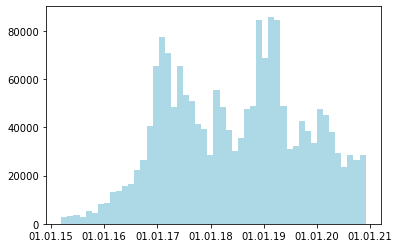

In [40]:
fig, ax = plt.subplots(1,1)
ax.hist(mpl_dt, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

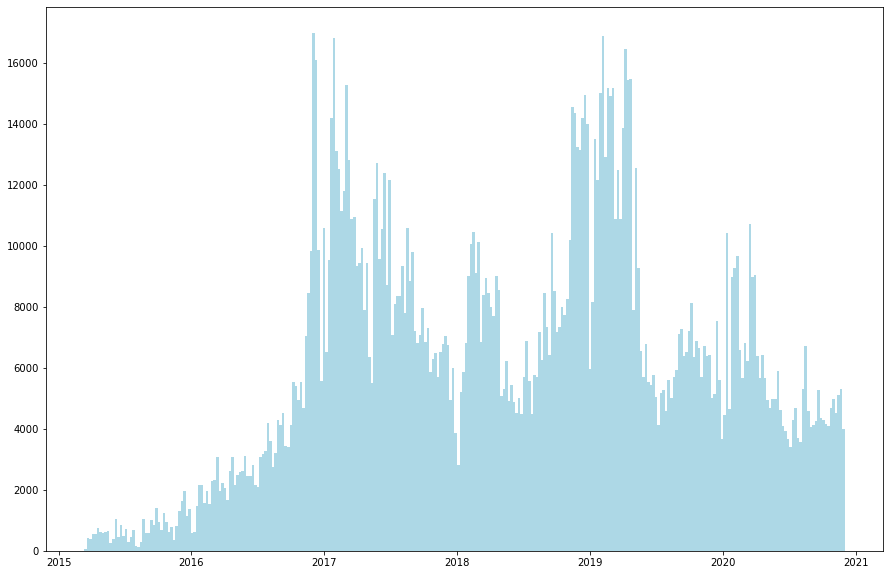

In [41]:
locator = mdates.AutoDateLocator()
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.hist(mpl_dt, bins=300, color='lightblue')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
plt.show()

# By day distribution

In [42]:
files

{'2019-08-05': {'_call_4_collaboration',
  '_jobs',
  '_meetings',
  '_meetings_ca',
  '_meetings_de',
  '_meetings_sf',
  '_meetings_siberia',
  '_meetings_spb',
  '_meetings_uk',
  '_meetings_ukraine',
  '_meetings_us',
  '_random_b',
  '_random_politics',
  '_random_talks',
  '_top_jobs',
  'big_data',
  'blockchain',
  'business',
  'career',
  'chess',
  'cv',
  'data_fest',
  'datasets',
  'deep_learning',
  'devops',
  'dlcourse_ai',
  'edu_academy',
  'edu_books',
  'edu_courses',
  'hardware',
  'interesting_links',
  'kaggle_crackers',
  'lang_python',
  'lang_r',
  'ml_pipeline',
  'mlcourse_ai',
  'mltrainings_beginners',
  'mltrainings_live',
  'nlp',
  'ods_habr',
  'ods_mentoring',
  'ods_sky_sport',
  'ods_sport',
  'ods_travel',
  'pr_jerk',
  'proj_kaggle_blindness',
  'proj_kaggle_champs',
  'proj_kaggle_fraud',
  'proj_kaggle_gan',
  'proj_kaggle_lanl',
  'proj_kaggle_protein',
  'proj_kaggle_salt',
  'proj_kaggle_severstal',
  'proj_nips_comp_19',
  'proj_punch_to_

In [43]:
import collections
files_sort = collections.OrderedDict(sorted(files.items()))
files_sort = [(datetime.strptime(i[0], '%Y-%m-%d'), len(i[1])) for i in files_sort.items()]
files_sort

[(datetime.datetime(2015, 3, 12, 0, 0), 2),
 (datetime.datetime(2015, 3, 15, 0, 0), 2),
 (datetime.datetime(2015, 3, 16, 0, 0), 2),
 (datetime.datetime(2015, 3, 17, 0, 0), 2),
 (datetime.datetime(2015, 3, 18, 0, 0), 2),
 (datetime.datetime(2015, 3, 19, 0, 0), 2),
 (datetime.datetime(2015, 3, 20, 0, 0), 2),
 (datetime.datetime(2015, 3, 21, 0, 0), 2),
 (datetime.datetime(2015, 3, 22, 0, 0), 5),
 (datetime.datetime(2015, 3, 23, 0, 0), 8),
 (datetime.datetime(2015, 3, 24, 0, 0), 2),
 (datetime.datetime(2015, 3, 25, 0, 0), 7),
 (datetime.datetime(2015, 3, 26, 0, 0), 6),
 (datetime.datetime(2015, 3, 27, 0, 0), 3),
 (datetime.datetime(2015, 3, 28, 0, 0), 7),
 (datetime.datetime(2015, 3, 29, 0, 0), 6),
 (datetime.datetime(2015, 3, 30, 0, 0), 5),
 (datetime.datetime(2015, 3, 31, 0, 0), 5),
 (datetime.datetime(2015, 4, 1, 0, 0), 11),
 (datetime.datetime(2015, 4, 2, 0, 0), 8),
 (datetime.datetime(2015, 4, 3, 0, 0), 7),
 (datetime.datetime(2015, 4, 4, 0, 0), 6),
 (datetime.datetime(2015, 4, 5, 0, 

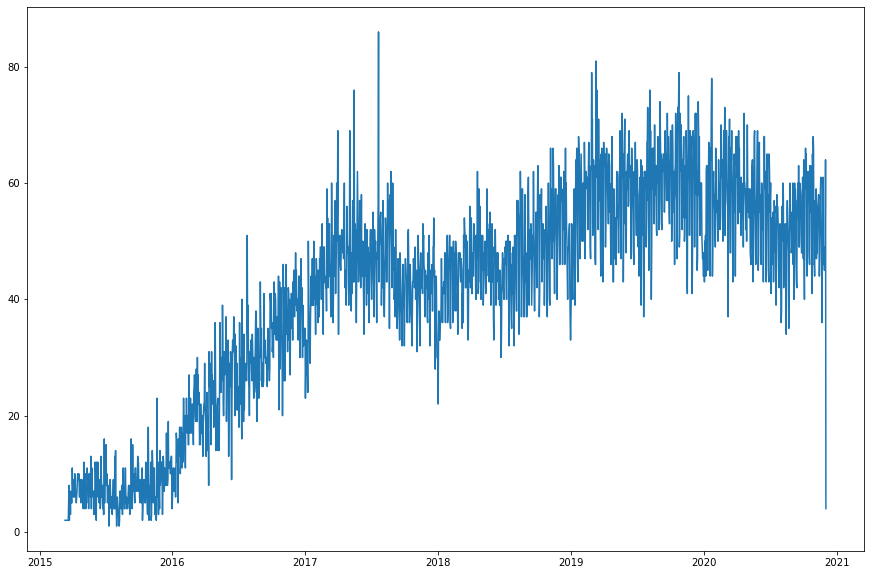

In [44]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(*zip(*files_sort))
plt.show()

# Temporal graph

In [45]:
def ts_builder(path_, list_of_channels, filename):
    
    dict_to_build = {}
    
    s_path = os.path.realpath(path_)

    for channel in list_of_channels:
        fullpath = os.path.join(s_path, channel, filename)
        with open(fullpath, 'r') as file_open:
            loaded = json.loads(file_open.read())
            
            for i in loaded:
                if i['type'] == 'message':
                    try:
                        try:
                            dict_to_build[i['user']].append((channel, i['ts']))
                        except KeyError:
                            dict_to_build[i['user']] = []
                            dict_to_build[i['user']].append((channel, i['ts']))
                    except KeyError:
                        continue
    return dict_to_build                      

In [63]:
dict_for_build = ts_builder('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020', files['2019-02-11'], '2019-02-11.json')

In [64]:
dict_for_build

{'U0PEXP9PH': [('security', '1549914731.000400'),
  ('cloud', '1549909972.000800'),
  ('cloud', '1549910059.001100'),
  ('ml_pipeline', '1549910751.018500'),
  ('ml_pipeline', '1549913300.021500'),
  ('cv', '1549915349.024200'),
  ('devops', '1549914518.003200'),
  ('devops', '1549914794.003700'),
  ('devops', '1549914942.004100')],
 'U3B7T7V8W': [('security', '1549924706.000500'),
  ('security', '1549924731.000800')],
 'UBCV44PSL': [('_meetings_siberia', '1549943993.002300')],
 'U28L7548M': [('_meetings_siberia', '1549944082.002800')],
 'UEDCNHWRX': [('class_cs231n', '1549902252.003900')],
 'U4ZRFG1V0': [('class_cs231n', '1549902502.004300'),
  ('_random_talks', '1549888425.007300'),
  ('_random_talks', '1549888499.007900'),
  ('_random_talks', '1549889105.009900'),
  ('kaggle_crackers', '1549887803.016400'),
  ('career', '1549908946.071000'),
  ('mlcourse_ai_news', '1549883793.021100'),
  ('theory_and_practice', '1549876293.016200'),
  ('mlcourse_ai', '1549882333.048300'),
  ('mlcour

In [48]:
import pathpy as pp

In [49]:
def network_builder(dict_to_build):
    
    day_net = pp.TemporalNetwork()
    
    for i in dict_to_build.values():
        
        last = 0 
        for j, k in enumerate(i):            
          
            if j == 0:
                day_net.add_edge(k[0], k[0], datetime.fromtimestamp(float(k[1])).strftime('%Y-%m-%d %H:%M:%S'))
                last = k[0]
                print(k[0], k[0], datetime.fromtimestamp(float(k[1])).strftime('%Y-%m-%d %H:%M:%S'))
            else:
                day_net.add_edge(last, k[0], datetime.fromtimestamp(float(k[1])).strftime('%Y-%m-%d %H:%M:%S'))
                print(last, k[0], datetime.fromtimestamp(float(k[1])).strftime('%Y-%m-%d %H:%M:%S'))
    return day_net

In [65]:
day_net = network_builder(dict_for_build)

security security 2019-02-11 21:52:11
security cloud 2019-02-11 20:32:52
security cloud 2019-02-11 20:34:19
security ml_pipeline 2019-02-11 20:45:51
security ml_pipeline 2019-02-11 21:28:20
security cv 2019-02-11 22:02:29
security devops 2019-02-11 21:48:38
security devops 2019-02-11 21:53:14
security devops 2019-02-11 21:55:42
security security 2019-02-12 00:38:26
security security 2019-02-12 00:38:51
_meetings_siberia _meetings_siberia 2019-02-12 05:59:53
_meetings_siberia _meetings_siberia 2019-02-12 06:01:22
class_cs231n class_cs231n 2019-02-11 18:24:12
class_cs231n class_cs231n 2019-02-11 18:28:22
class_cs231n _random_talks 2019-02-11 14:33:45
class_cs231n _random_talks 2019-02-11 14:34:59
class_cs231n _random_talks 2019-02-11 14:45:05
class_cs231n kaggle_crackers 2019-02-11 14:23:23
class_cs231n career 2019-02-11 20:15:46
class_cs231n mlcourse_ai_news 2019-02-11 13:16:33
class_cs231n theory_and_practice 2019-02-11 11:11:33
class_cs231n mlcourse_ai 2019-02-11 12:52:13
class_cs231n

mlcourse_ai_news mlcourse_ai 2019-02-11 17:42:31
mlcourse_ai_news mlcourse_ai 2019-02-11 17:45:14
mlcourse_ai_news mlcourse_ai 2019-02-11 17:53:25
mlcourse_ai_news mlcourse_ai_news 2019-02-11 17:44:52
mlcourse_ai_news mlcourse_ai_news 2019-02-11 20:28:42
mlcourse_ai_news mlcourse_ai_news 2019-02-11 20:36:22
mlcourse_ai_news mlcourse_ai_news 2019-02-11 20:39:26
mlcourse_ai_news mlcourse_ai_news 2019-02-11 21:03:18
mlcourse_ai_news mlcourse_ai_news 2019-02-11 17:45:37
mlcourse_ai_news mlcourse_ai_news 2019-02-11 17:48:18
mlcourse_ai_news mlcourse_ai_news 2019-02-11 19:40:20
mlcourse_ai_news mlcourse_ai_news 2019-02-11 21:21:52
mlcourse_ai_news mlcourse_ai 2019-02-11 15:32:29
mlcourse_ai_news mlcourse_ai 2019-02-11 15:34:49
mlcourse_ai_news mlcourse_ai 2019-02-11 15:46:15
mlcourse_ai_news mlcourse_ai 2019-02-11 16:09:43
mlcourse_ai_news mlcourse_ai 2019-02-11 16:15:54
mlcourse_ai_news mlcourse_ai 2019-02-11 16:25:18
mlcourse_ai_news mlcourse_ai 2019-02-11 18:41:04
mlcourse_ai_news _meetin

mlcourse_ai mlcourse_ai 2019-02-11 14:07:08
mlcourse_ai mlcourse_ai 2019-02-11 14:07:17
mlcourse_ai mlcourse_ai 2019-02-11 14:07:40
mlcourse_ai mlcourse_ai 2019-02-11 14:08:20
mlcourse_ai mlcourse_ai 2019-02-11 14:08:49
mlcourse_ai mlcourse_ai 2019-02-11 14:09:54
mlcourse_ai mlcourse_ai 2019-02-11 14:09:56
mlcourse_ai mlcourse_ai 2019-02-11 14:12:39
mlcourse_ai mlcourse_ai 2019-02-11 14:12:47
mlcourse_ai mlcourse_ai 2019-02-11 14:12:57
mlcourse_ai mlcourse_ai 2019-02-11 14:13:12
mlcourse_ai mlcourse_ai 2019-02-11 14:14:29
mlcourse_ai mlcourse_ai 2019-02-11 14:15:35
mlcourse_ai mlcourse_ai 2019-02-11 14:16:18
mlcourse_ai mlcourse_ai 2019-02-11 14:17:16
mlcourse_ai mlcourse_ai 2019-02-11 14:17:18
mlcourse_ai mlcourse_ai 2019-02-11 14:18:06
mlcourse_ai mlcourse_ai 2019-02-11 14:18:19
mlcourse_ai mlcourse_ai 2019-02-11 14:19:15
mlcourse_ai mlcourse_ai 2019-02-11 14:20:16
mlcourse_ai mlcourse_ai 2019-02-11 14:26:18
mlcourse_ai mlcourse_ai 2019-02-11 16:16:58
mlcourse_ai mlcourse_ai 2019-02-

_random_b _random_b 2019-02-11 20:57:40
_random_b _random_b 2019-02-11 20:58:06
_random_b _random_b 2019-02-11 20:59:44
_random_b _random_b 2019-02-11 21:03:53
_random_b _random_b 2019-02-11 21:08:29
_random_b _random_b 2019-02-11 21:08:54
_random_b _random_b 2019-02-11 21:25:54
_random_b _random_b 2019-02-11 21:26:03
_random_b _random_b 2019-02-11 22:05:25
_random_b _random_b 2019-02-11 22:19:38
_random_b _random_b 2019-02-11 22:24:04
_random_b _random_b 2019-02-11 22:25:14
_random_b _random_b 2019-02-11 22:29:34
_random_b _random_b 2019-02-11 22:55:27
_random_b _random_b 2019-02-11 23:36:32
_random_b _random_b 2019-02-11 23:38:42
_random_b _random_b 2019-02-11 23:39:05
_random_b _random_b 2019-02-11 23:39:43
_random_b _random_b 2019-02-11 23:42:12
_random_b _random_b 2019-02-11 23:42:22
_random_b _random_b 2019-02-11 23:42:49
_random_b _random_b 2019-02-11 23:43:20
_random_b _random_b 2019-02-11 23:43:25
_random_b _random_b 2019-02-11 23:44:26
_random_b _random_b 2019-02-11 23:46:15


In [66]:
print(day_net)

Nodes:			61
Time-stamped links:	3115
Links/Nodes:		51.0655737704918
Observation period:	[1549872000, 1549958351]
Observation length:	 86351 
Time stamps:		 3039 
Avg. inter-event dt:	 28.42363396971692
Min/Max inter-event dt:	 1/1838


In [95]:
style = {    
  'ts_per_frame': 50, 
  'ms_per_frame': 50,
  'look_ahead': 20, 
  'look_behind': 20, 
  'node_size': 9, 
  'inactive_edge_width': 2,
  'active_edge_width': 8, 
  'label_color' : '#000000',
  'label_size' : '25px',
  'label_offset': [0,5],
    'height': 1200,
    'width': 1200,
  }

In [134]:
pp.visualisation.plot(day_net, **style)

In [96]:
pp.visualisation.export_html(day_net, 'static/day_net.html', **style)

In [90]:
help(pp.visualisation.plot)

Help on function plot in module pathpy.visualisation.html:

plot(network, **params)
    Plots an interactive visualisation of pathpy objects
    in a jupyter notebook. This generic function supports instances of
    pathpy.Network, pathpy.TemporalNetwork, pathpy.HigherOrderNetwork,
    pathpy.MultiOrderModel, and pathpy.Paths. See description of different
    visualisations in the parameter description.
    
    Parameters
    ----------
    network: Network, TemporalNetwork, HigherOrderNetwork, MultiOrderModel, Paths
        The object to visualize. Depending on the type of the object passed, the following
        visualisations are generated:
            Network: interactive visualisation of a network with a force-directed layout.
            HigherOrderNetwork: interactive visualisation of the first-order network
                with forces calculated based on the higher-order network. By setting
                plot_higher_order_nodes=True a network with unprojected
               